In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

In [2]:
np.random.seed(42)

# Logistic Regression

The goal of a binary logistic regression is to model the probability of a random variable $Y$ being 0 or 1 given experimental data. It may be trained on multiclass problems as well, but the focus will be on binary classes.

The logistic regression curve is defined by the sigmoid function, with equation presented below.

<center>
    $ \Pr(Y=1\mid X; \hat{\beta}) = {\dfrac {1}{1+e^{-X^{T}\hat{\beta} + \beta_0}}} = h_\hat{\beta}(X) \implies \Pr(Y=0\mid X; \hat{\beta}) = 1 - h_\hat{\beta}(X) $
</center>

Where $\hat{\beta}$ is the vector of coefficients, $\beta_0$ is the bias and $X$ is the vector of features.

Let's start by defining them.

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
def prediction(weights, features, bias):
    y_hat = sigmoid(np.dot(weights, features.T) + bias)
    return y_hat

In [85]:
preds = prediction(weigths, pd.DataFrame(X_), bias)

### Loss Function

For logistic regression, least squares estimation is not capable of producing minimum variance unbiased estimators for the actual parameters. In its place, maximum likelihood estimation / cross-entropy minimization is used to solve for the parameters that best fit the data.

The cross-entropy is defined by

<center>
    $ H(y, p) = - \sum\limits_{1}^n y_i\ln(p_i)+(1-y_i)\ln(1-p_i) = Error$
</center>

Where $y$ is the binary classification distribution and $p$ the predicted event probability.

In [9]:
def loss_function(y, p):
    y = np.array(y)
    p = np.array(p)
    ce = -y * np.log(p) - (1 - y) * np.log(1 - p)
    return ce

To minimize the loss function, gradient descent may be used, it works by updating the weights and bias proportionally to the derivative of the loss function. The cross entropy derivative is defined by

<center>
    $ \nabla Error =  -(y - \hat{y})(x_1, x_2, \dots, x_n, 1) $
</center>

Therefore, the weights and bias are updated in the following way:

<center>
    $ w_i^{\prime} \leftarrow w_i + \alpha (y - \hat{y}) x_i $
</center>

<center>
    $b^{\prime} \leftarrow b + \alpha (y - \hat{y})$
</center>

Where $\alpha$ is the learning rate.

In [21]:
def update_weigths(x, y, y_hat, weights, bias, learning_rate):

    bias += learning_rate * (y - y_hat)
    weights += learning_rate * (y - y_hat) * x

    return weights, bias

Ok! We are ready to train a logistic regression. For simplicity batch gradient descent will be used, but for larger datasets stochastic gradient descent presents a faster convergence.

### Training the Model

In [22]:
data = pd.read_csv('data.csv', header=None)
data.columns = ['x0', 'x1', 'y']

In [23]:
X = data[['x0', 'x1']].values
y = data.y.values

In [49]:
def train(X, y, n_iters, learning_rate):

    n_features = X.shape[1]
    errors = []
    last_loss = None

    bias = 0
    weigths = np.random.normal(scale=1/np.sqrt(n_features), size=n_features)

    for _ in range(n_iters):
        for features, target in zip(X, y):
            # Calcula predição
            y_hat = prediction(weigths, features, bias)
            # Calcula o erro
            error = loss_function(target, y_hat)
            # Atualiza os pesos
            weigths, bias = update_weigths(features, target, y_hat, weigths, bias, learning_rate)

    return weigths, bias

In [50]:
X = data[['x0', 'x1']].values
y = data.y.values
n_iters = 100
learning_rate = 0.001

weigths, bias = train(X, y, n_iters, learning_rate)

In [27]:
weigths, bias

(array([-9.12288645, -9.36534074]), 9.685346548637284)

### Visualizing the Results

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

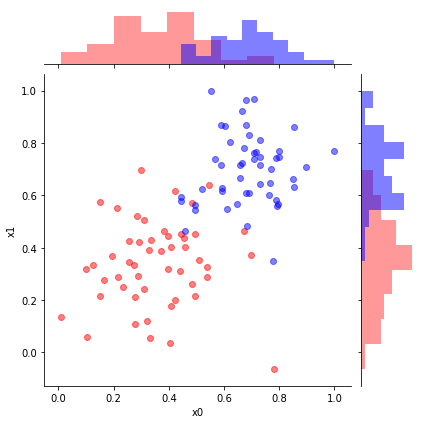

In [30]:
j = sns.jointplot(
    data=data[data.y == 1],
    x='x0',
    y='x1',
    color='r',
    alpha=.5
)

j.ax_joint.scatter(
    data=data[data.y == 0],
    x='x0',
    y='x1',
    color='b',
    alpha=.5
)

j.ax_marg_x.hist(
    data=data[data.y == 0],
    x='x0',
    color='b',
    alpha=.5
)

j.ax_marg_y.hist(
    data=data[data.y == 0],
    orientation='horizontal',
    x='x1',
    color='b',
    alpha=.5
)

plt.show()

In [36]:
x0 = np.linspace(0, 1, 100)
x1 = np.linspace(0, 1, 100)

In [ ]:
numpy.dstack(numpy.meshgrid(x, y)).reshape(-1, 2)

In [45]:
X_ = np.dstack(np.meshgrid([x0, x1])).reshape(-1, 2)

In [63]:
np.matmul(weigths, X_.T)

array([-0.00225427, -0.02022609, -0.03819791, -0.05616972, -0.07414154,
       -0.09211336, -0.11008518, -0.128057  , -0.14602882, -0.16400063,
       -0.18197245, -0.19994427, -0.21791609, -0.23588791, -0.25385972,
       -0.27183154, -0.28980336, -0.30777518, -0.325747  , -0.34371882,
       -0.36169063, -0.37966245, -0.39763427, -0.41560609, -0.43357791,
       -0.45154972, -0.46952154, -0.48749336, -0.50546518, -0.523437  ,
       -0.54140881, -0.55938063, -0.57735245, -0.59532427, -0.61329609,
       -0.63126791, -0.64923972, -0.66721154, -0.68518336, -0.70315518,
       -0.721127  , -0.73909881, -0.75707063, -0.77504245, -0.79301427,
       -0.81098609, -0.82895791, -0.84692972, -0.86490154, -0.88287336,
       -0.00225427, -0.02022609, -0.03819791, -0.05616972, -0.07414154,
       -0.09211336, -0.11008518, -0.128057  , -0.14602882, -0.16400063,
       -0.18197245, -0.19994427, -0.21791609, -0.23588791, -0.25385972,
       -0.27183154, -0.28980336, -0.30777518, -0.325747  , -0.34